In [2]:
#read date&time from csv
import csv
def read_date(pth):
    dates=[]
    with open(pth, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if(len(row[0].split('-')) != 3):
                continue
            #print(row[0])
            y,m,d=row[0].split('-')
            dates.append({'year':int(y), 'mon':int(m), 'day':int(d)})
    return dates

In [3]:
def count(dates):
    rst={}
    for d in dates:
        if d['year'] not in rst:
            rst[d['year']]=[0]*12 
        rst[d['year']][d['mon']-1] += 1  
    return rst

In [15]:
#draw distrubtion each month
import matplotlib.pyplot as plt
import datetime

def drawMonBar(dist, title=''):
    count=[0]*12
    yFrom = 3000
    yTo = 0
    for k in dist:
        v = dist[k]
        #ignore this year as not valid data
        if k!=datetime.datetime.now().year:
            yFrom = min(k, yFrom)
            yTo = max(k, yTo)
            count=[count[i] + v[i] for i in range(12)]  
    bars=plt.bar(left=[i for i in range(1, 13)], height=count)
    plt.xlabel('month', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()
    

In [52]:
#draw distrubtion each year
import matplotlib.pyplot as plt
import datetime

def drawYearBar(records, title=''):
    yFrom = 3000
    yTo = -1
    yearDict={}
    for r in records:
        if r['year']!=datetime.datetime.now().year:
            yFrom = min(r['year'], yFrom)
            yTo = max(yTo, r['year'])
    count=[0]*(yTo-yFrom+1)
    for r in records:
        if r['year']!=datetime.datetime.now().year:
            count[r['year']-yFrom]+=1
    print(count)
    bars=plt.bar(left=[i for i in range(yFrom, yTo+1)], height=count)
    plt.xlabel('year', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()

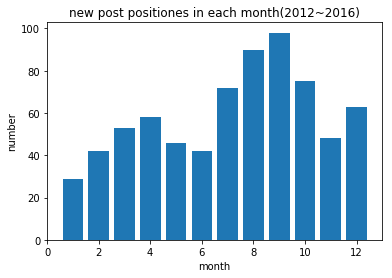

In [19]:
newPos = read_date('new-position-date.csv')
posDist = count(newPos)
drawMonBar(posDist, 'new post positiones in each month')
#

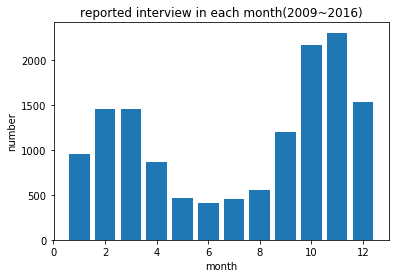

In [23]:
intRep = read_date('interview-report-date.csv')
intDist = count(intRep)
drawMonBar(intDist, 'reported interview in each month')

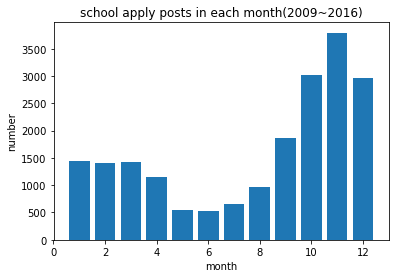

In [25]:
schAply = read_date('school-apply-date.csv')
schDist = count(schAply)#09-16
drawMonBar(schDist, 'school apply posts in each month')

[745, 1362, 2286, 2916, 3153, 2796, 2615, 3900]


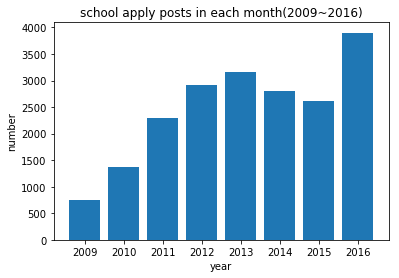

In [53]:
drawYearBar(schAply, 'school apply posts in each month')

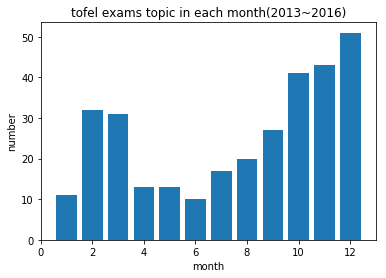

In [55]:
tofel = read_date('tofel.csv')
tofel = count(tofel)#09-16
drawMonBar(tofel, 'tofel exams topic in each month')